In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import missingno as msno
from functions import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

# Read in the Data

declare columns names

In [2]:
column_names = ['age' , 'workclass' , 'fnlwgt' , 'education' , 'education-num' , 'marital-status' , 'occupation' , 'relationship' , 'race' , 'sex' , 'capital-gain' , 'capital-loss' , 'hours-per-week' , 'native-country', "target"]

In [3]:
adultDF = pd.read_csv('./data/adult.data', index_col=False, names=column_names)

## Clean the Data

In [4]:
adultDF = strip_spaces(adultDF)

stripped leading/trailing spaces from all cells of string type


In [5]:
columns_with_placeholders = ['workclass', 'occupation', 'native-country']
adultDF = replace_column_w_nan(adultDF,columns_with_placeholders, "?")

Replaced ? values from these columns:['workclass', 'occupation', 'native-country']


Because of the results of our EDA, we will be able to drop missing rows: 
- The workclass column is missing 5.6% of rows
- The occupation column is missing 5.7% of rows
- The native-country column is missing 1.8% of rows

In [6]:
adultDF = drop_na_rows(adultDF, columns_with_placeholders)

Removed NA rows from these columns:['workclass', 'occupation', 'native-country'].


In [7]:
adultDF = adultDF.drop_duplicates()
check_duplicates(adultDF)

You're all clear of duplicates


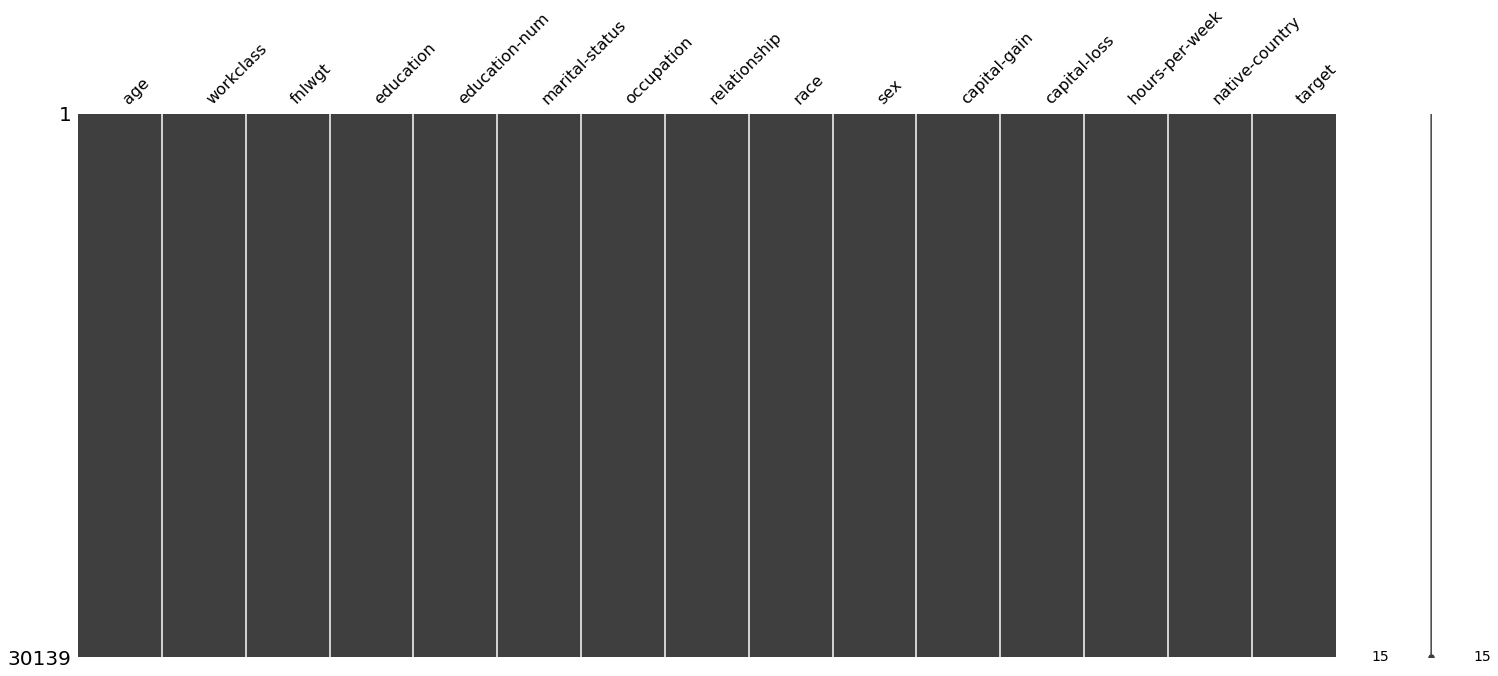

In [8]:
msno.matrix(adultDF)

At this point, we have stripped all white spaces, removed 24 duplicates, replaced '?' values with NaNs, and finally dropped rows with missing values.

We don't see a need to drop any columns for cleaned data - we'll leave that for the model notebook to determine which columns are relevant or not. 

We can however, explore the distribution of the data for outliers and such.

In [53]:
adultDF.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,29991.000000,2.999100e+04,29991.000000,29991.000000,29991.000000,29991.000000
mean,38.403554,1.897777e+05,10.108399,604.757727,88.876363,40.888700
std,13.131274,1.056723e+05,2.541005,2579.054141,405.394135,11.958376
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176060e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784290e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376140e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,41310.000000,4356.000000,99.000000


# Check for Outliers

In [9]:
continuous_columns = list(adultDF.describe().columns)

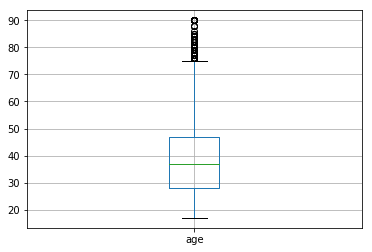

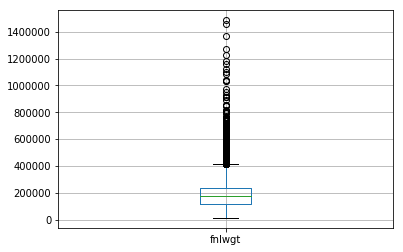

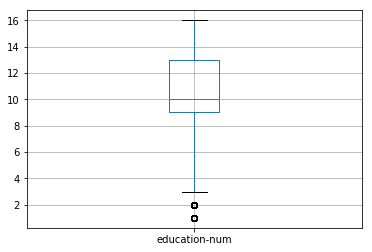

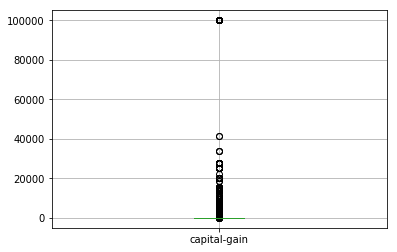

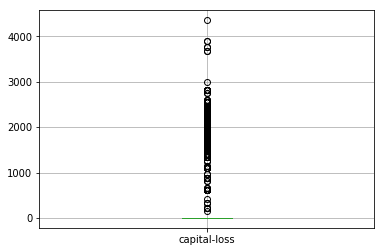

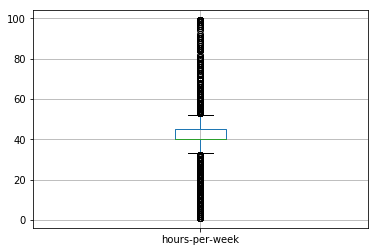

In [23]:
import matplotlib.pyplot as plt

for column in continuous_columns:
    plt.figure()
    adultDF.boxplot([column])

In [50]:
adultDF[adultDF['capital-gain'] > 20000]['capital-gain'].value_counts().sort_index(ascending=False)

41310     2
34095     3
27828    32
25236    11
25124     2
22040     1
20051    33
Name: capital-gain, dtype: int64

In [48]:
adultDF = adultDF[adultDF['capital-gain'] != 99999]

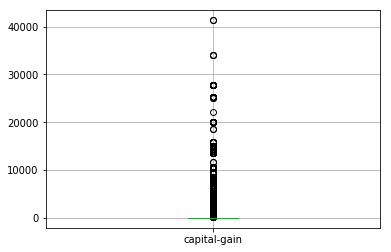

In [52]:
adultDF.boxplot(['capital-gain'])

In [62]:
adultDF[adultDF['capital-loss'] > 0]['capital-loss'].value_counts().sort_index(ascending=False)

4356     1
3900     2
3770     2
3683     2
3004     1
2824     8
2754     2
2603     4
2559    12
2547     4
2472     1
2467     1
2457     1
2444    12
2415    45
2392     8
2377    17
2352     2
2339    14
2282     1
2267     3
2258    25
2246     6
2238     2
2231     3
2206     5
2205     8
2201     1
2179    14
2174     6
        ..
1668     3
1651     9
1648     2
1628    13
1617     9
1602    34
1594     8
1590    37
1579    20
1573     5
1564    24
1539     1
1504    16
1485    45
1411     1
1408    19
1380     7
1340     7
1258     3
1138     2
1092     7
974      2
880      6
810      2
653      3
625     12
419      1
323      3
213      4
155      1
Name: capital-loss, Length: 89, dtype: int64